In [1]:
# Imports
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import graphviz


In [2]:
# Reading Data
df = pd.read_csv('../Week 5/DataSetForPhishingVSBenignUrl.csv')

In [3]:
# Analyzing data
print("Number of Samples: ", df.shape[0])
print("Number of features: ", df.shape[1])

Number of Samples:  36707
Number of features:  80


In [4]:
df.head()

,Querylength,domain_token_count,path_token_count,avgdomaintokenlen,longdomaintokenlen,avgpathtokenlen,tld,charcompvowels,charcompace,ldl_url,...,SymbolCount_FileName,SymbolCount_Extension,SymbolCount_Afterpath,Entropy_URL,Entropy_Domain,Entropy_DirectoryName,Entropy_Filename,Entropy_Extension,Entropy_Afterpath,URL_Type_obf_Type
0,0,4,5,5.5,14,4.400000,4,8,3,0,...,1,0,-1,0.726298,0.784493,0.894886,0.850608,NaN,-1.0,Defacement
1,0,4,5,5.5,14,6.000000,4,12,4,0,...,0,0,-1,0.688635,0.784493,0.814725,0.859793,0.0,-1.0,Defacement
2,0,4,5,5.5,14,5.800000,4,12,5,0,...,0,0,-1,0.695049,0.784493,0.814725,0.801880,0.0,-1.0,Defacement
3,0,4,12,5.5,14,5.500000,4,32,16,0,...,0,0,-1,0.640130,0.784493,0.814725,0.663210,0.0,-1.0,Defacement
4,0,4,6,5.5,14,7.333334,4,18,11,0,...,0,0,-1,0.681307,0.784493,0.814725,0.804526,0.0,-1.0,Defacement


Reading the dataset information (https://www.unb.ca/cic/datasets/url-2016.html), our class type is 'URL_Type_obf_Type'. It consists of: benign, spam, phishing, malware, and defacement.

### Data pre-processing

We are making a decision here on what to with that NaN values, which cannot be fed into the decision tree. We have decided to drop any dataset that contains a NaN value. Other options included assigning a value of our choosing. 

What is the impact of nan? what should we do? 

After performing an analysis of the data, it is clear that almost all the NaN values are in the feature 'NumberRate_Extension', 'Entropy_Extension', 'Entropy_DirectoryName','Entropy_Filename', 'avgpathtokenlen'. It is NOT related to one specific class, but seems relatively well distributed cross all five classes. As such a removal of any entries that contain NaN is evaluated. Dropping any entry with NaN in it would be equal to 48% of the dataset. Which is quite significant. Some features containing NaN such as 'avgpathtokenlen' disproporitionaly are of a certain class (such as phising in the case of avgpathtokenlen). 

As such, we performed an analysis on accuracy if we simply drop any entries that contain a NaN feature, and still obtained high accuracy in our training and test sets. For the purposes of this assignment we chose to drop NaN entries entirely. However, wanted to demonstrate that we went through the analysis prior. 

In [5]:
df2=df.dropna().reset_index(drop=True)
# Analyzing data change
print("Number of Samples: ", df2.shape[0])
print("Number of features: ", df2.shape[1])

# a drop is about 48% of the dataset

Number of Samples:  18982
Number of features:  80


In [6]:
#storing for future graphing purposes
feature_names = df2.columns[:-1]
class_names = df2.URL_Type_obf_Type.unique()

print(class_names)
#print(feature_names)

['Defacement' 'benign' 'malware' 'phishing' 'spam']


In [7]:
#we are just looking at fishing vs benign as per professor disable this cell if you want to run against all classes

#either method below should work
#remove_list= ['Defacement','malware','spam']
#df = df[~df['URL_Type_obf_Type'].isin(remove_list)]
df2.query("URL_Type_obf_Type in ('benign', 'phishing')",inplace=True)
df2.reset_index(drop=True)

#only our class list
class_names = df2.URL_Type_obf_Type.unique()
print(class_names)
#print(feature_names)

['benign' 'phishing']


In [8]:
df2.head()

,Querylength,domain_token_count,path_token_count,avgdomaintokenlen,longdomaintokenlen,avgpathtokenlen,tld,charcompvowels,charcompace,ldl_url,...,SymbolCount_FileName,SymbolCount_Extension,SymbolCount_Afterpath,Entropy_URL,Entropy_Domain,Entropy_DirectoryName,Entropy_Filename,Entropy_Extension,Entropy_Afterpath,URL_Type_obf_Type
2477,0,2,12,5.5,8,4.083334,2,15,7,0,...,-1,-1,-1,0.676804,0.860529,-1.000000,-1.000000,-1.00000,-1.000000,benign
2478,0,3,12,5.0,10,3.583333,3,12,8,2,...,1,0,-1,0.715629,0.776796,0.693127,0.738315,1.00000,-1.000000,benign
2479,19,2,10,6.0,9,2.250000,2,9,5,0,...,5,4,3,0.747202,0.833700,0.655459,0.829535,0.83615,0.823008,benign
2480,0,2,10,5.5,9,4.100000,2,15,11,0,...,-1,-1,-1,0.732981,0.860529,-1.000000,-1.000000,-1.00000,-1.000000,benign
2481,0,2,9,2.5,3,4.555555,2,6,3,0,...,1,0,-1,0.742606,1.000000,0.785719,0.808833,1.00000,-1.000000,benign


In [9]:
X = df2.values[:, :-1]
y = df2.values[:,-1]

In [10]:
print(y)

['benign' 'benign' 'benign' ... 'phishing' 'phishing' 'phishing']


In [11]:
columns_ = list(df.columns) #storing the column names

pd.DataFrame(X) #sanity check

,0,1,2,3,4,5,6,7,8,9,...,69,70,71,72,73,74,75,76,77,78
0,0,2,12,5.5,8,4.083334,2,15,7,0,...,-1,-1,-1,-1,0.676804,0.860529,-1.0,-1.0,-1.0,-1.0
1,0,3,12,5.0,10,3.583333,3,12,8,2,...,2,1,0,-1,0.715629,0.776796,0.693127,0.738315,1.0,-1.0
2,19,2,10,6.0,9,2.25,2,9,5,0,...,1,5,4,3,0.747202,0.8337,0.655459,0.829535,0.83615,0.823008
3,0,2,10,5.5,9,4.1,2,15,11,0,...,-1,-1,-1,-1,0.732981,0.860529,-1.0,-1.0,-1.0,-1.0
4,0,2,9,2.5,3,4.555555,2,6,3,0,...,5,1,0,-1,0.742606,1.0,0.785719,0.808833,1.0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6718,0,2,5,5.5,8,2.8,2,5,1,0,...,2,1,0,-1,0.734789,0.95351,0.693127,1.0,1.0,-1.0
6719,0,2,5,3.5,5,3.6,2,5,2,0,...,2,1,0,-1,0.793129,0.916667,0.859582,1.0,1.0,-1.0
6720,0,2,4,7.0,12,3.0,2,4,2,0,...,1,1,0,-1,0.797564,0.918863,0.871049,1.0,1.0,-1.0
6721,0,3,5,4.666666,10,2.0,3,3,2,0,...,2,1,0,-1,0.758084,0.90625,0.833333,1.0,1.0,-1.0


#### Undersampling

In [12]:
#from https://imbalanced-learn.org/stable/references/generated/imblearn.under_sampling.RandomUnderSampler.html

from collections import Counter
from sklearn.datasets import make_classification
from imblearn.under_sampling import RandomUnderSampler 

print('Original dataset shape %s' % Counter(y))

rus = RandomUnderSampler(random_state=42)
X_res, y_res = rus.fit_resample(X, y)
print('Resampled dataset shape %s' % Counter(y_res))

Original dataset shape Counter({'phishing': 4014, 'benign': 2709})
Resampled dataset shape Counter({'benign': 2709, 'phishing': 2709})


#### Splitting the data into train and test sets

In [13]:
test_size_ = 0.2
random_state_ = 100

X_train, X_test, y_train, y_test = train_test_split( X_res, y_res, test_size = test_size_, random_state = random_state_)

### Decision Tree Training
* Let’s build our decision tree classifiers using Gini index & Entropy as criterion. 

In [14]:
#We are going to store the accuracies for visualization
#format = [depth,accuracy]
gini_acc_test = []
ent_acc_test = []

gini_acc_train = []
ent_acc_train = []

gini_abs_diff = []
ent_abs_diff = []

#### Gini Impurity

##### max_depth = 1

In [15]:
# Decision Tree classifier with criteria - Gini Index

max_depth_ = 1
min_samples_leaf_ = 5

tree_gini = DecisionTreeClassifier(criterion = "gini", random_state = 50,
                               max_depth=max_depth_, min_samples_leaf=min_samples_leaf_)
tree_gini.fit(X_train, y_train)
y_pred_gini = tree_gini.predict(X_test)
y_pred_gini_train = tree_gini.predict(X_train)

In [16]:
# Accuracy for Decision Tree classifier with criterion as gini index
acc_score_test = accuracy_score(y_test,y_pred_gini)*100
acc_score_train = accuracy_score(y_train,y_pred_gini_train)*100
print("Test Accuracy for a Decision Tree with criteria as Gini Index and max depth of", max_depth_, "is: ", acc_score_test)
print("Train Accuracy for a Decision Tree with criteria as Gini Index and max depth of", max_depth_, "is: ", acc_score_train)
diff = abs(acc_score_test-acc_score_train)
gini_abs_diff.append([max_depth_,diff])
print("The abs difference is: ", diff)
gini_acc_test.append([max_depth_,acc_score_test])
gini_acc_train.append([max_depth_,acc_score_train])

Test Accuracy for a Decision Tree with criteria as Gini Index and max depth of 1 is:  81.82656826568265
Train Accuracy for a Decision Tree with criteria as Gini Index and max depth of 1 is:  81.79510844485463
The abs difference is:  0.03145982082801879


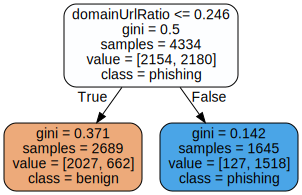

In [17]:
# Visualizing the Gini Index based Decision Tree
graph_data = tree.export_graphviz(tree_gini, out_file=None, filled=True, rounded=True,
                                feature_names=feature_names,  
                                class_names=class_names)
graph = graphviz.Source(graph_data)  


graph

##### max_depth = 2

In [18]:
# Decision Tree classifier with criteria - Gini Index

max_depth_ = 2
min_samples_leaf_ = 5

tree_gini = DecisionTreeClassifier(criterion = "gini", random_state = 50,
                               max_depth=max_depth_, min_samples_leaf=min_samples_leaf_)
tree_gini.fit(X_train, y_train)
y_pred_gini = tree_gini.predict(X_test)
y_pred_gini_train = tree_gini.predict(X_train)

In [19]:
# Accuracy for Decision Tree classifier with criterion as gini index
acc_score_test = accuracy_score(y_test,y_pred_gini)*100
acc_score_train = accuracy_score(y_train,y_pred_gini_train)*100
print("Test Accuracy for a Decision Tree with criteria as Gini Index and max depth of", max_depth_, "is: ", acc_score_test)
print("Train Accuracy for a Decision Tree with criteria as Gini Index and max depth of", max_depth_, "is: ", acc_score_train)
diff = abs(acc_score_test-acc_score_train)
gini_abs_diff.append([max_depth_,diff])
print("The abs difference is: ", diff)
gini_acc_test.append([max_depth_,acc_score_test])
gini_acc_train.append([max_depth_,acc_score_train])

Test Accuracy for a Decision Tree with criteria as Gini Index and max depth of 2 is:  89.39114391143912
Train Accuracy for a Decision Tree with criteria as Gini Index and max depth of 2 is:  88.46331333640978
The abs difference is:  0.9278305750293327


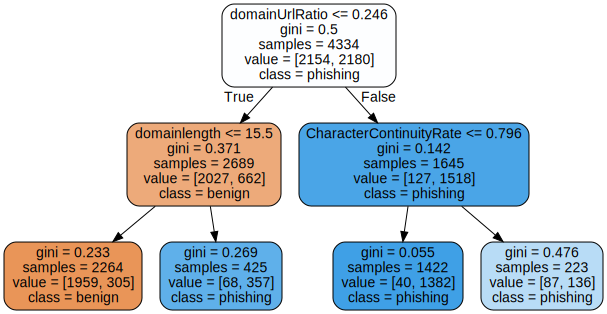

In [20]:
# Visualizing the Gini Index based Decision Tree
graph_data = tree.export_graphviz(tree_gini, out_file=None, filled=True, rounded=True,
                                feature_names=feature_names,  
                                class_names=class_names)
graph = graphviz.Source(graph_data)  


graph

##### max_depth = 3

In [21]:
# Decision Tree classifier with criteria - Gini Index

max_depth_ = 3
min_samples_leaf_ = 5

tree_gini = DecisionTreeClassifier(criterion = "gini", random_state = 50,
                               max_depth=max_depth_, min_samples_leaf=min_samples_leaf_)
tree_gini.fit(X_train, y_train)
y_pred_gini = tree_gini.predict(X_test)
y_pred_gini_train = tree_gini.predict(X_train)

In [22]:
# Accuracy for Decision Tree classifier with criterion as gini index
acc_score_test = accuracy_score(y_test,y_pred_gini)*100
acc_score_train = accuracy_score(y_train,y_pred_gini_train)*100
print("Test Accuracy for a Decision Tree with criteria as Gini Index and max depth of", max_depth_, "is: ", acc_score_test)
print("Train Accuracy for a Decision Tree with criteria as Gini Index and max depth of", max_depth_, "is: ", acc_score_train)
diff = abs(acc_score_test-acc_score_train)
gini_abs_diff.append([max_depth_,diff])
print("The abs difference is: ", diff)
gini_acc_test.append([max_depth_,acc_score_test])
gini_acc_train.append([max_depth_,acc_score_train])

Test Accuracy for a Decision Tree with criteria as Gini Index and max depth of 3 is:  92.71217712177122
Train Accuracy for a Decision Tree with criteria as Gini Index and max depth of 3 is:  91.11675126903553
The abs difference is:  1.595425852735687


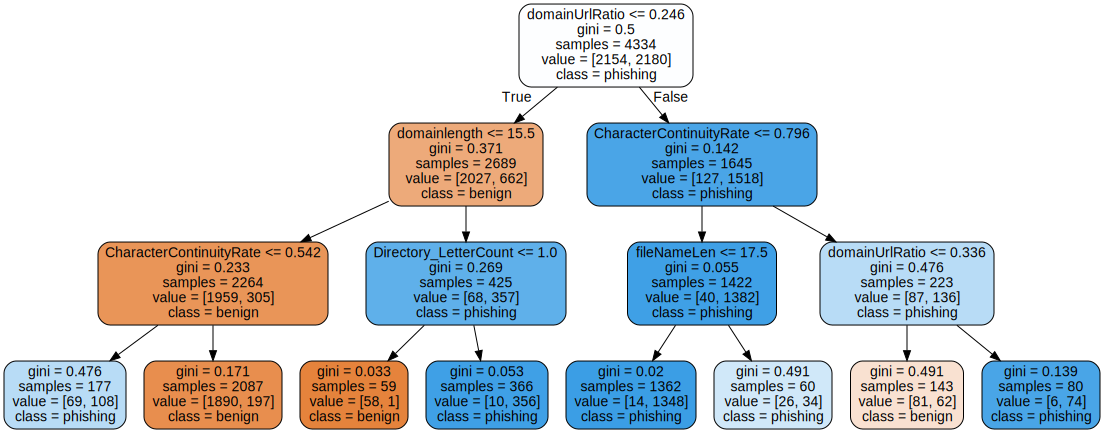

In [23]:
# Visualizing the Gini Index based Decision Tree
graph_data = tree.export_graphviz(tree_gini, out_file=None, filled=True, rounded=True,
                                feature_names=feature_names,  
                                class_names=class_names)
graph = graphviz.Source(graph_data)  


graph

##### max_depth = 4

In [24]:
# Decision Tree classifier with criteria - Gini Index

max_depth_ = 4
min_samples_leaf_ = 5

tree_gini = DecisionTreeClassifier(criterion = "gini", random_state = 50,
                               max_depth=max_depth_, min_samples_leaf=min_samples_leaf_)
tree_gini.fit(X_train, y_train)
y_pred_gini = tree_gini.predict(X_test)
y_pred_gini_train = tree_gini.predict(X_train)

In [25]:
# Accuracy for Decision Tree classifier with criterion as gini index
acc_score_test = accuracy_score(y_test,y_pred_gini)*100
acc_score_train = accuracy_score(y_train,y_pred_gini_train)*100
print("Test Accuracy for a Decision Tree with criteria as Gini Index and max depth of", max_depth_, "is: ", acc_score_test)
print("Train Accuracy for a Decision Tree with criteria as Gini Index and max depth of", max_depth_, "is: ", acc_score_train)
diff = abs(acc_score_test-acc_score_train)
gini_abs_diff.append([max_depth_,diff])
print("The abs difference is: ", diff)
gini_acc_test.append([max_depth_,acc_score_test])
gini_acc_train.append([max_depth_,acc_score_train])

Test Accuracy for a Decision Tree with criteria as Gini Index and max depth of 4 is:  92.98892988929889
Train Accuracy for a Decision Tree with criteria as Gini Index and max depth of 4 is:  92.96262113520997
The abs difference is:  0.026308754088915975


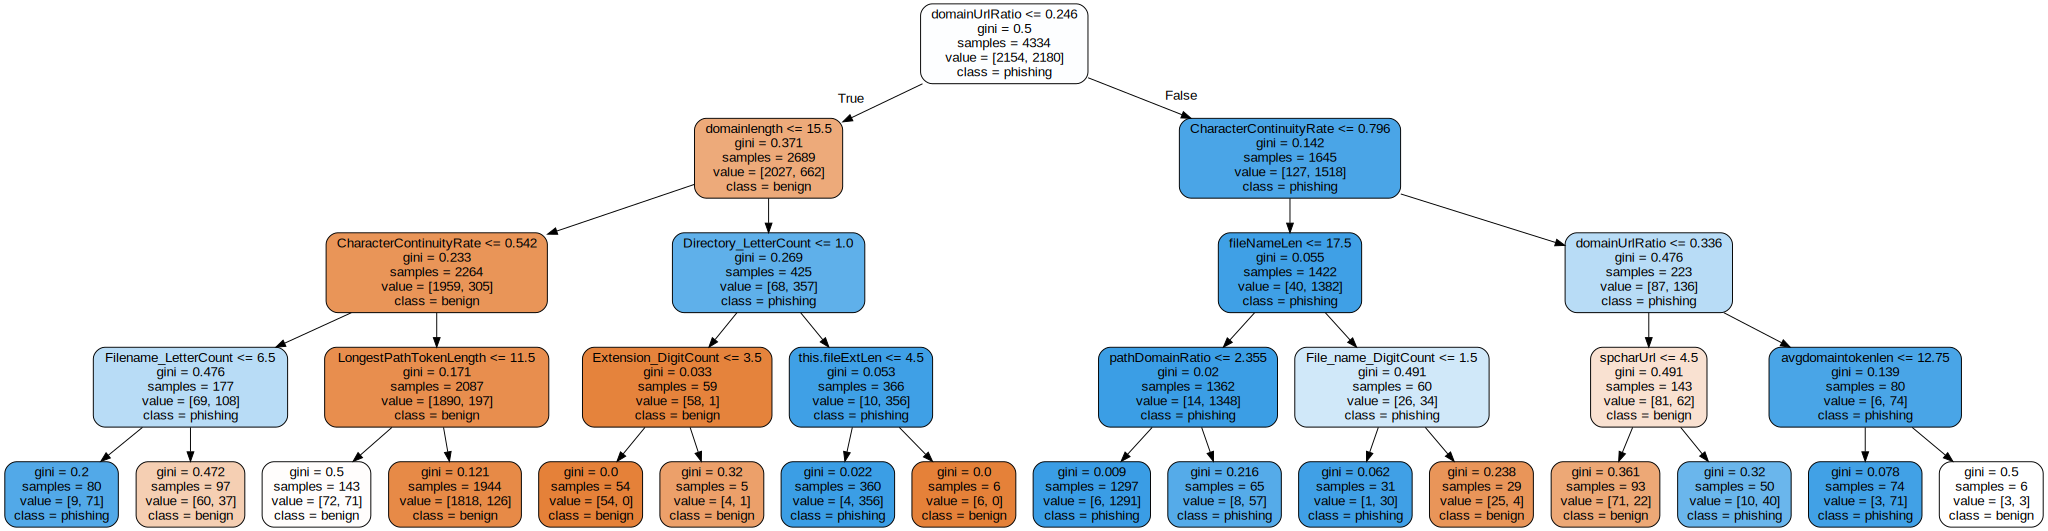

In [26]:
# Visualizing the Gini Index based Decision Tree
graph_data = tree.export_graphviz(tree_gini, out_file=None, filled=True, rounded=True,
                                feature_names=feature_names,  
                                class_names=class_names)
graph = graphviz.Source(graph_data)  


graph

##### max_depth = 5

In [27]:
# Decision Tree classifier with criteria - Gini Index

max_depth_ = 5
min_samples_leaf_ = 5

tree_gini = DecisionTreeClassifier(criterion = "gini", random_state = 50,
                               max_depth=max_depth_, min_samples_leaf=min_samples_leaf_)
tree_gini.fit(X_train, y_train)
y_pred_gini = tree_gini.predict(X_test)
y_pred_gini_train = tree_gini.predict(X_train)

In [28]:
# Accuracy for Decision Tree classifier with criterion as gini index
acc_score_test = accuracy_score(y_test,y_pred_gini)*100
acc_score_train = accuracy_score(y_train,y_pred_gini_train)*100
print("Test Accuracy for a Decision Tree with criteria as Gini Index and max depth of", max_depth_, "is: ", acc_score_test)
print("Train Accuracy for a Decision Tree with criteria as Gini Index and max depth of", max_depth_, "is: ", acc_score_train)
diff = abs(acc_score_test-acc_score_train)
gini_abs_diff.append([max_depth_,diff])
print("The abs difference is: ", diff)
gini_acc_test.append([max_depth_,acc_score_test])
gini_acc_train.append([max_depth_,acc_score_train])

Test Accuracy for a Decision Tree with criteria as Gini Index and max depth of 5 is:  95.11070110701108
Train Accuracy for a Decision Tree with criteria as Gini Index and max depth of 5 is:  95.20073834794647
The abs difference is:  0.09003724093538779


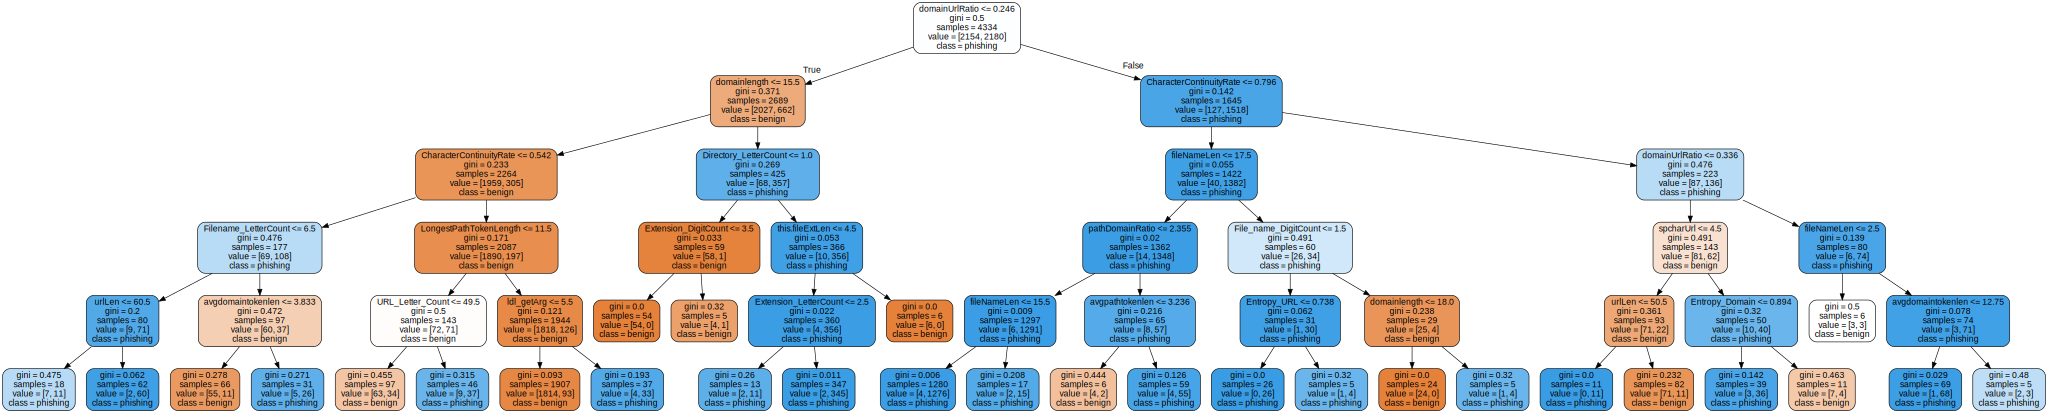

In [29]:
# Visualizing the Gini Index based Decision Tree
graph_data = tree.export_graphviz(tree_gini, out_file=None, filled=True, rounded=True,
                                feature_names=feature_names,  
                                class_names=class_names)
graph = graphviz.Source(graph_data)  


graph

##### max_depth = 6

In [30]:
# Decision Tree classifier with criteria - Gini Index

max_depth_ = 6
min_samples_leaf_ = 5

tree_gini = DecisionTreeClassifier(criterion = "gini", random_state = 50,
                               max_depth=max_depth_, min_samples_leaf=min_samples_leaf_)
tree_gini.fit(X_train, y_train)
y_pred_gini = tree_gini.predict(X_test)
y_pred_gini_train = tree_gini.predict(X_train)

In [31]:
# Accuracy for Decision Tree classifier with criterion as gini index
acc_score_test = accuracy_score(y_test,y_pred_gini)*100
acc_score_train = accuracy_score(y_train,y_pred_gini_train)*100
print("Test Accuracy for a Decision Tree with criteria as Gini Index and max depth of", max_depth_, "is: ", acc_score_test)
print("Train Accuracy for a Decision Tree with criteria as Gini Index and max depth of", max_depth_, "is: ", acc_score_train)
diff = abs(acc_score_test-acc_score_train)
gini_abs_diff.append([max_depth_,diff])
print("The abs difference is: ", diff)
gini_acc_test.append([max_depth_,acc_score_test])
gini_acc_train.append([max_depth_,acc_score_train])

Test Accuracy for a Decision Tree with criteria as Gini Index and max depth of 6 is:  94.4649446494465
Train Accuracy for a Decision Tree with criteria as Gini Index and max depth of 6 is:  95.91601292108906
The abs difference is:  1.4510682716425691


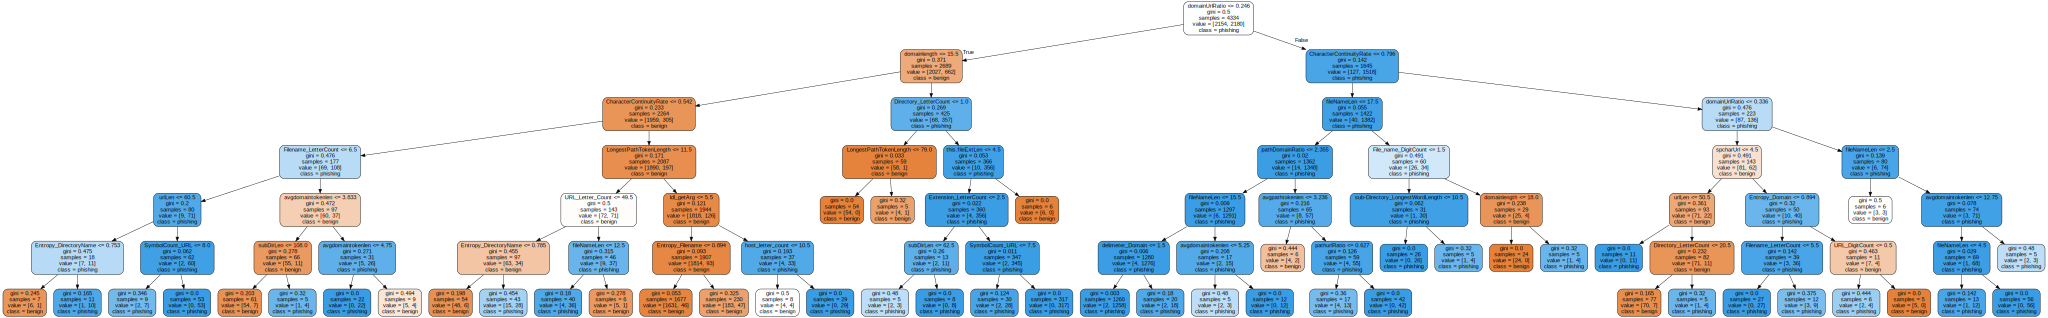

In [32]:
# Visualizing the Gini Index based Decision Tree
graph_data = tree.export_graphviz(tree_gini, out_file=None, filled=True, rounded=True,
                                feature_names=feature_names,  
                                class_names=class_names)
graph = graphviz.Source(graph_data)  


graph

#### Discussion of Gini Criteria as related to Accuracy and Max Depth

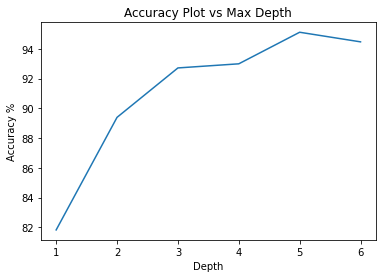

[[1, 81.82656826568265], [2, 89.39114391143912], [3, 92.71217712177122], [4, 92.98892988929889], [5, 95.11070110701108], [6, 94.4649446494465]]


In [33]:
def feature_plot(table):
 
    x_axis = []
    for i in range(len(table)):
        x_axis.append(table[i][1])
    
    y_axis = []
    for i in range(len(table)):
        y_axis.append(table[i][0])

    plt.plot(y_axis, x_axis) 
    plt.ylabel("Accuracy %") 
    plt.xlabel("Depth") 
    title_val = "Accuracy Plot vs Max Depth"
    plt.title(title_val)
    
   
    plt.show()

feature_plot(gini_acc_test)

print(gini_acc_test)

The above seems to indicate that the gradient is slowly approaching zero as depth increases. In order to see if true we are going to quickly model up to a depth of 25, incrementing one at a time. We also identified a max value. 

In [34]:
# Decision Tree classifier with criteria - Gini Index
iter = 25
gini_test_run = []

for i in range(1,iter+1):
  
    
    max_depth_ = i
    min_samples_leaf_ = 5

    tree_gini = DecisionTreeClassifier(criterion = "gini", random_state = 50,
                               max_depth=max_depth_, min_samples_leaf=min_samples_leaf_)
    tree_gini.fit(X_train, y_train)
    y_pred_gini = tree_gini.predict(X_test)

    acc_score = accuracy_score(y_test,y_pred_gini)*100
    gini_test_run.append([max_depth_,acc_score])

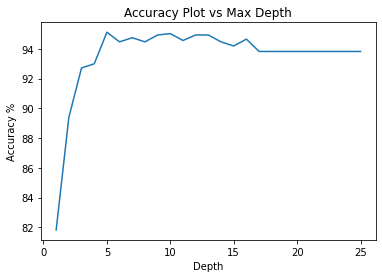

In [35]:
feature_plot(gini_test_run)
#print(gini_test_run)

This means that without any pruning or min_sample_leaf modifications, there seems to be an 'optimal' after which the increase in accuracy approaches a limit (0). 

Another interesting observation is that when max_depth <4 the test accuracy was higher than the training accuracy. However, once we reached max_depth >=4 the training accuracy was higher than the test accuracy. 

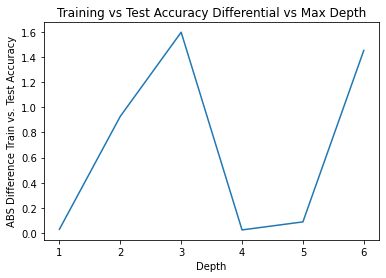

In [36]:
def feature_plot_diff(table):
 
    x_axis = []
    for i in range(len(table)):
        x_axis.append(table[i][1])
    
    y_axis = []
    for i in range(len(table)):
        y_axis.append(table[i][0])

    plt.plot(y_axis, x_axis) 
    plt.ylabel("ABS Difference Train vs. Test Accuracy") 
    plt.xlabel("Depth") 
    title_val = "Training vs Test Accuracy Differential vs Max Depth"
    plt.title(title_val)
    
   
    plt.show()


feature_plot_diff(gini_abs_diff)


We can see some drift between accuracy and test data with low max_depth whcih is causing potential fitting issues. When plotting it we can see almost a U-based curve highlighting the transition from under to over fitting. As we can see initially there is almost a 1.6 point different at a max_depth of 3. As we approach a depth of 4 we see how we approach a 'well fitted' model, after which we loose this relationship. Notice we are looking at the absolute value, but there is a change occuring between over and under fitting due to the change in relationship between train and test accuracy. 

#### Entropy Impurity

In [37]:
# Decision Tree classifier with criteria - Entropy

max_depth_ = 1
min_samples_leaf_ = 5

tree_entropy = DecisionTreeClassifier(criterion = "entropy", random_state = 50,
                                      max_depth=max_depth_, min_samples_leaf=min_samples_leaf_)
tree_entropy.fit(X_train, y_train)
y_pred_entropy = tree_entropy.predict(X_test)
y_pred_entropy_train = tree_entropy.predict(X_train)

In [38]:
# Accuracy for Decision Tree classifier with criterion as entropy 
acc_score_test = accuracy_score(y_test,y_pred_entropy)*100
acc_score_train = accuracy_score(y_train,y_pred_entropy_train)*100
print("Test Accuracy for a Decision Tree with criteria as Entropy Index and max depth of", max_depth_, "is: ", acc_score_test)
print("Train Accuracy for a Decision Tree with criteria as Entropy Index and max depth of", max_depth_, "is: ", acc_score_train)
diff = abs(acc_score_test-acc_score_train)
ent_abs_diff.append([max_depth_,diff])
print("The abs difference is: ", diff)
ent_acc_test.append([max_depth_,acc_score_test])
ent_acc_train.append([max_depth_,acc_score_train])

Test Accuracy for a Decision Tree with criteria as Entropy Index and max depth of 1 is:  81.82656826568265
Train Accuracy for a Decision Tree with criteria as Entropy Index and max depth of 1 is:  81.79510844485463
The abs difference is:  0.03145982082801879


In [39]:
# Decision Tree classifier with criteria - Entropy

max_depth_ = 2
min_samples_leaf_ = 5

tree_entropy = DecisionTreeClassifier(criterion = "entropy", random_state = 50,
                                      max_depth=max_depth_, min_samples_leaf=min_samples_leaf_)
tree_entropy.fit(X_train, y_train)
y_pred_entropy = tree_entropy.predict(X_test)
y_pred_entropy_train = tree_entropy.predict(X_train)

In [40]:
# Accuracy for Decision Tree classifier with criterion as entropy 
acc_score_test = accuracy_score(y_test,y_pred_entropy)*100
acc_score_train = accuracy_score(y_train,y_pred_entropy_train)*100
print("Test Accuracy for a Decision Tree with criteria as Entropy Index and max depth of", max_depth_, "is: ", acc_score_test)
print("Train Accuracy for a Decision Tree with criteria as Entropy Index and max depth of", max_depth_, "is: ", acc_score_train)
diff = abs(acc_score_test-acc_score_train)
ent_abs_diff.append([max_depth_,diff])
print("The abs difference is: ", diff)
ent_acc_test.append([max_depth_,acc_score_test])
ent_acc_train.append([max_depth_,acc_score_train])

Test Accuracy for a Decision Tree with criteria as Entropy Index and max depth of 2 is:  89.39114391143912
Train Accuracy for a Decision Tree with criteria as Entropy Index and max depth of 2 is:  88.46331333640978
The abs difference is:  0.9278305750293327


In [41]:
# Decision Tree classifier with criteria - Entropy

max_depth_ = 3
min_samples_leaf_ = 5

tree_entropy = DecisionTreeClassifier(criterion = "entropy", random_state = 50,
                                      max_depth=max_depth_, min_samples_leaf=min_samples_leaf_)
tree_entropy.fit(X_train, y_train)
y_pred_entropy = tree_entropy.predict(X_test)
y_pred_entropy_train = tree_entropy.predict(X_train)

In [42]:
# Accuracy for Decision Tree classifier with criterion as entropy 
acc_score_test = accuracy_score(y_test,y_pred_entropy)*100
acc_score_train = accuracy_score(y_train,y_pred_entropy_train)*100
print("Test Accuracy for a Decision Tree with criteria as Entropy Index and max depth of", max_depth_, "is: ", acc_score_test)
print("Train Accuracy for a Decision Tree with criteria as Entropy Index and max depth of", max_depth_, "is: ", acc_score_train)
diff = abs(acc_score_test-acc_score_train)
ent_abs_diff.append([max_depth_,diff])
print("The abs difference is: ", diff)
ent_acc_test.append([max_depth_,acc_score_test])
ent_acc_train.append([max_depth_,acc_score_train])

Test Accuracy for a Decision Tree with criteria as Entropy Index and max depth of 3 is:  90.40590405904058
Train Accuracy for a Decision Tree with criteria as Entropy Index and max depth of 3 is:  89.91693585602215
The abs difference is:  0.48896820301843036


In [43]:
# Decision Tree classifier with criteria - Entropy

max_depth_ = 4
min_samples_leaf_ = 5

tree_entropy = DecisionTreeClassifier(criterion = "entropy", random_state = 50,
                                      max_depth=max_depth_, min_samples_leaf=min_samples_leaf_)
tree_entropy.fit(X_train, y_train)
y_pred_entropy = tree_entropy.predict(X_test)
y_pred_entropy_train = tree_entropy.predict(X_train)


In [44]:
# Accuracy for Decision Tree classifier with criterion as entropy 
acc_score_test = accuracy_score(y_test,y_pred_entropy)*100
acc_score_train = accuracy_score(y_train,y_pred_entropy_train)*100
print("Test Accuracy for a Decision Tree with criteria as Entropy Index and max depth of", max_depth_, "is: ", acc_score_test)
print("Train Accuracy for a Decision Tree with criteria as Entropy Index and max depth of", max_depth_, "is: ", acc_score_train)
diff = abs(acc_score_test-acc_score_train)
ent_abs_diff.append([max_depth_,diff])
print("The abs difference is: ", diff)
ent_acc_test.append([max_depth_,acc_score_test])
ent_acc_train.append([max_depth_,acc_score_train])

Test Accuracy for a Decision Tree with criteria as Entropy Index and max depth of 4 is:  92.25092250922509
Train Accuracy for a Decision Tree with criteria as Entropy Index and max depth of 4 is:  91.55514536225196
The abs difference is:  0.6957771469731284


In [45]:
# Decision Tree classifier with criteria - Entropy

max_depth_ = 5
min_samples_leaf_ = 5

tree_entropy = DecisionTreeClassifier(criterion = "entropy", random_state = 50,
                                      max_depth=max_depth_, min_samples_leaf=min_samples_leaf_)
tree_entropy.fit(X_train, y_train)
y_pred_entropy = tree_entropy.predict(X_test)
y_pred_entropy_train = tree_entropy.predict(X_train)


In [46]:
# Accuracy for Decision Tree classifier with criterion as entropy 
acc_score_test = accuracy_score(y_test,y_pred_entropy)*100
acc_score_train = accuracy_score(y_train,y_pred_entropy_train)*100
print("Test Accuracy for a Decision Tree with criteria as Entropy Index and max depth of", max_depth_, "is: ", acc_score_test)
print("Train Accuracy for a Decision Tree with criteria as Entropy Index and max depth of", max_depth_, "is: ", acc_score_train)
diff = abs(acc_score_test-acc_score_train)
ent_abs_diff.append([max_depth_,diff])
print("The abs difference is: ", diff)
ent_acc_test.append([max_depth_,acc_score_test])
ent_acc_train.append([max_depth_,acc_score_train])

Test Accuracy for a Decision Tree with criteria as Entropy Index and max depth of 5 is:  94.0959409594096
Train Accuracy for a Decision Tree with criteria as Entropy Index and max depth of 5 is:  94.13936317489618
The abs difference is:  0.04342221548657221


In [47]:
# Decision Tree classifier with criteria - Entropy

max_depth_ = 6
min_samples_leaf_ = 5

tree_entropy = DecisionTreeClassifier(criterion = "entropy", random_state = 50,
                                      max_depth=max_depth_, min_samples_leaf=min_samples_leaf_)
tree_entropy.fit(X_train, y_train)
y_pred_entropy = tree_entropy.predict(X_test)
y_pred_entropy_train = tree_entropy.predict(X_train)


In [48]:
# Accuracy for Decision Tree classifier with criterion as entropy 
acc_score_test = accuracy_score(y_test,y_pred_entropy)*100
acc_score_train = accuracy_score(y_train,y_pred_entropy_train)*100
print("Test Accuracy for a Decision Tree with criteria as Entropy Index and max depth of", max_depth_, "is: ", acc_score_test)
print("Train Accuracy for a Decision Tree with criteria as Entropy Index and max depth of", max_depth_, "is: ", acc_score_train)
diff = abs(acc_score_test-acc_score_train)
ent_abs_diff.append([max_depth_,diff])
print("The abs difference is: ", diff)
ent_acc_test.append([max_depth_,acc_score_test])
ent_acc_train.append([max_depth_,acc_score_train])

Test Accuracy for a Decision Tree with criteria as Entropy Index and max depth of 6 is:  95.38745387453874
Train Accuracy for a Decision Tree with criteria as Entropy Index and max depth of 6 is:  95.50069220119981
The abs difference is:  0.11323832666107592


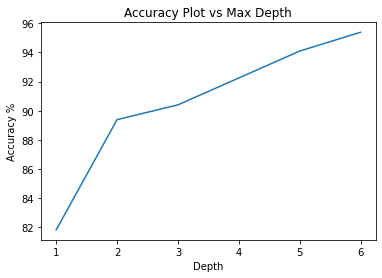

[[1, 81.82656826568265], [2, 89.39114391143912], [3, 90.40590405904058], [4, 92.25092250922509], [5, 94.0959409594096], [6, 95.38745387453874]]


In [49]:
feature_plot(ent_acc_test)
print(ent_acc_test)

Let's see if we observe the same gradiant decline as we did with gini impurity

In [50]:
# Decision Tree classifier with criteria - Gini Index
iter = 25
ent_test_run = []

for i in range(1,iter+1):
  
    
    max_depth_ = i
    min_samples_leaf_ = 5

    tree_entropy = DecisionTreeClassifier(criterion = "entropy", random_state = 50,
                               max_depth=max_depth_, min_samples_leaf=min_samples_leaf_)
    tree_entropy.fit(X_train, y_train)
    y_pred_entropy = tree_entropy.predict(X_test)

    acc_score = accuracy_score(y_test,y_pred_entropy)*100
    ent_test_run.append([max_depth_,acc_score])

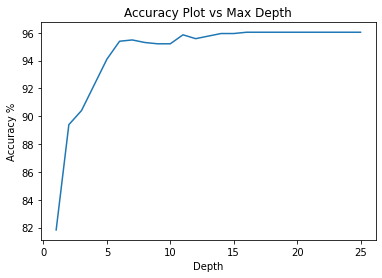

In [51]:
feature_plot(ent_test_run)

The answer is YES! They operate with a very similar relationship between accuracy and depth. We can observe (see below) that our entropy model does demonstrate a different behavior when it comes to reviewing testing vs training accuracy. We experience a similar tightening of the difference between testing and training, but then an interesting reduction in difference once we passed max_depth 4. We will plot this out further in the 'extra steps' section.

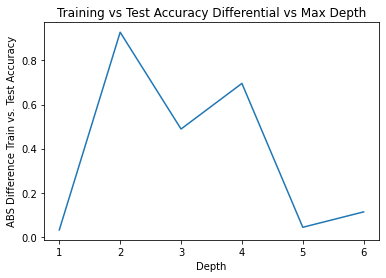

In [52]:
feature_plot_diff(ent_abs_diff)

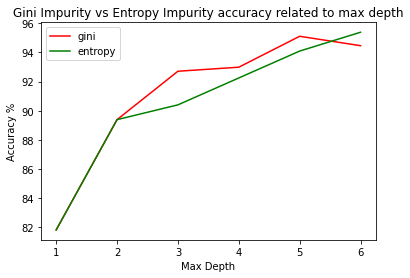

In [53]:

# importing libraries
import matplotlib.pyplot as plt
import numpy as np
import math
  

#we are ASSUMING identical cardinality between each set (this is risky for error)
X = []
for i in range(len(gini_acc_test)): 
    X.append(gini_acc_test[i][0])

Y1=[]
for i in range(len(gini_acc_test)): 
    Y1.append(gini_acc_test[i][1])
Y2 = []
for i in range(len(ent_acc_test)): 
    Y2.append(ent_acc_test[i][1])

plt.plot(X, Y1, color='r', label='gini')
plt.plot(X, Y2, color='g', label='entropy')


plt.xlabel("Max Depth")
plt.ylabel("Accuracy %")
plt.title("Gini Impurity vs Entropy Impurity accuracy related to max depth")
  

plt.legend()
  
plt.show()

The gini impurity is a measure of the frequency at which an element in our dataset for Phishing VS BenignUrl that has been pre-processed may be mislabelled when it is randomly assigned a label. In other words, a pure node implies that all elements of that node are a unique class (randomly we will also have a probability of 1 that a specific class is chosen), in this case the Gini Index is 0. 

Entropy is a measure of the 'disorder' of features within our dataset. The maximum value for entropy is when the probability of two classes is identical (50/50) and a node is considered pure a it's minimum value which is 0. 

Entropy is a more complex computational undertaking since it relies on summating the logarithms of data. Therefore, we can expect training time of a tree with entropy criteria to potentially take longer. 

### Visualize the Decision Graph

In [54]:
# Decision Tree classifier with criteria - Entropy

max_depth_ = 2
min_samples_leaf_ = 5

tree_entropy = DecisionTreeClassifier(criterion = "entropy", random_state = 50,
                                      max_depth=max_depth_, min_samples_leaf=min_samples_leaf_)
tree_entropy.fit(X_train, y_train)
y_pred_entropy = tree_entropy.predict(X_test)


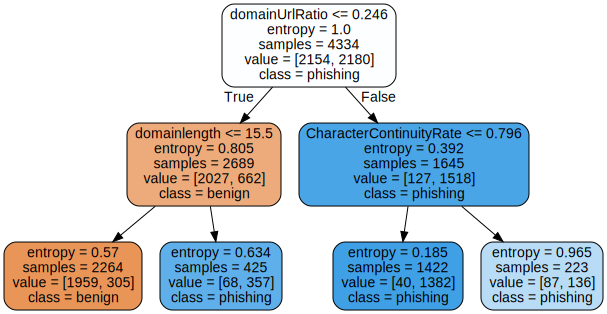

In [55]:
# Visualizing the Gini Index based Decision Tree
graph_data = tree.export_graphviz(tree_entropy, out_file=None, filled=True, rounded=True,
                                feature_names=feature_names,  
                                class_names=class_names)
graph = graphviz.Source(graph_data)  


graph

### Discussion

We can also see which features are 'important' for decision making and the sequence. For example, regardless of max_depth domainUrlRatio is the first feature upon which a decision is made regardless of depth. We can observe this hierarchical consistency in features throughout the modeling. 

What is very interesting to note, that even with a max_depth of 2 we are experiencing an accuracy of around 89% (test) with a relatively simplistic model. As previously mentioned, the entropy model relies on summating the logarithms of the data, which is more complex than the gini index approach. That said, for most situations the difference between the two is minimal. Gini may help minimize missclassification while entropy will help find groupings potentially easier. 

I suspect we may be dealing with a pretty deterministic dataset, which is why we initially saw relatively similar results between gini and entropy. By taking the entropy approach we can look at this from an exploratory analysis perspective. One thing we have learned is that the primary group is domainUrlRatio, and only if <=0.246 we need to differentiate between benign and phishing. If > 0.246 they are of the phishing class. I do want to note, I find it unrealistic to just look at PhishingvsBenign, considering how many other classes the dataset contained. However, if we were building for example a simple rule-based firewall that only evaluated benign vs phishing activity, we could create a simple deep packet inspection rule that would block any traffic for which we observe the domainUrlRatio as being greater than 0.246. These insights could lead to low-latency solutions using low-power, cheap to manufacture hardware/software.

##### Discussion Extra Steps - Further Analysis

Note the default criterion for the decisiontreeclassifier is 'gini'
Source - https://scikit-learn.org/0.15/modules/generated/sklearn.tree.DecisionTreeClassifier.html

We're are going to take a look at how gini and entropy perform under different pruning parameters (modifying our max_depth). 

In [56]:
dtree = DecisionTreeClassifier(criterion='gini')
dtree.fit(X_train, y_train)
pred = dtree.predict(X_test)
print('Criterion=gini', accuracy_score(y_test, pred))
dtree = DecisionTreeClassifier(criterion='entropy')
dtree.fit(X_train, y_train)
pred = dtree.predict(X_test)
print('Criterion=entropy', accuracy_score(y_test, pred))

Criterion=gini 0.9686346863468634
Criterion=entropy 0.9686346863468634


Gini scores slightly better in testing accuracy. We previously looked at test vs training accuracy and there seems to be little indication of overfitting with either criterion.

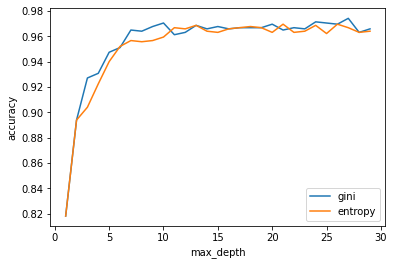

In [57]:
#Modified from Source: https://towardsdatascience.com/decision-tree-build-prune-and-visualize-it-using-python-12ceee9af752

max_depth = []
acc_gini = []
acc_entropy = []
diff_gini = []
diff_ent = []

for i in range(1,30):
 dtree = DecisionTreeClassifier(criterion='gini', max_depth=i)
 dtree.fit(X_train, y_train)
 pred = dtree.predict(X_test)
 pred_train = dtree.predict(X_train)
 score_train = accuracy_score(y_train, pred_train)
 score_test = accuracy_score(y_test, pred)
 diff_gini.append(abs(score_train-score_test))
    
 acc_gini.append(score_test)
    
 ####

 dtree = DecisionTreeClassifier(criterion='entropy', max_depth=i)
 dtree.fit(X_train, y_train)
 pred = dtree.predict(X_test)
 pred_train = dtree.predict(X_train)
 score_train = accuracy_score(y_train, pred_train)
 score_test = accuracy_score(y_test, pred)
 diff_ent.append(abs(score_train-score_test))   
    
 acc_entropy.append(accuracy_score(y_test, pred))

 ####
    
 max_depth.append(i)

d = pd.DataFrame({'acc_gini':pd.Series(acc_gini),'acc_entropy':pd.Series(acc_entropy),'max_depth':pd.Series(max_depth)})

# visualizing changes in parameters
plt.plot('max_depth','acc_gini', data=d, label='gini')
plt.plot('max_depth','acc_entropy', data=d, label='entropy')
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.legend()

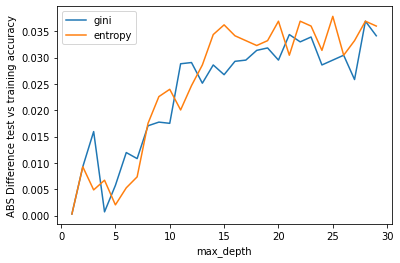

In [58]:
d = pd.DataFrame({'diff_gini':pd.Series(diff_gini),'diff_ent':pd.Series(diff_ent),'max_depth':pd.Series(max_depth)})

# visualizing changes in parameters
plt.plot('max_depth','diff_gini', data=d, label='gini')
plt.plot('max_depth','diff_ent', data=d, label='entropy')
plt.xlabel('max_depth')
plt.ylabel('ABS Difference test vs training accuracy')
plt.legend()

We can see that as we expanded the sampling at different max depths that now the entropy model **does** follow a similar U shaped model when looking at the ABS difference. When just going to a max depth of 6 we were not able to visually observe the trend. This again shows how influential the pruning process is. Note that we are not expressing the value as a % here, that is 10% is equal to 0.1. Therefore 0.04 is equal to 4%. We can see that eventually there is oscillation around a certain ABS difference between training and testing. We can also see that when plotting purely accuracy we hit a limit in accuracy regardless of max_depth. 